# Descriptive Analytics

In [ ]:
# Here is an example Python code snippet that loads the dataset and creates a scatter plot of the quantity sold versus the price.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go
from math import pi
import squarify
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from prettytable import PrettyTable

# Load the dataset
df = pd.read_excel('online_retail_II.xlsx')



In [ ]:
# Dimension of the dataset
df.shape

(525461, 9)

In [ ]:
# Most frequently occurring value under every attribute.
t = PrettyTable(['Attribute', 'Most freq', 'Frequency'])

for each in df:
    t.add_row([each, df[each].value_counts().index[0], df[each].value_counts().iloc[0]])

print(t)

+---------------------+------------------------------------+-----------+
|      Attribute      |             Most freq              | Frequency |
+---------------------+------------------------------------+-----------+
|       Invoice       |               537434               |    675    |
|      StockCode      |               85123A               |    3516   |
|     Description     | WHITE HANGING HEART T-LIGHT HOLDER |    3549   |
|       Quantity      |                 1                  |   146118  |
|     InvoiceDate     |        2010-12-06 16:57:00         |    675    |
|        Price        |                1.25                |   53932   |
|     Customer ID     |              14911.0               |    5710   |
|       Country       |           United Kingdom           |   485852  |
| Quantity_normalized |         0.3339245965498052         |   146118  |
+---------------------+------------------------------------+-----------+


In [ ]:
# Datatype of every attribute
print(df.dtypes)

Invoice                        object
StockCode                      object
Description                    object
Quantity                        int64
InvoiceDate            datetime64[ns]
Price                         float64
Customer ID                   float64
Country                        object
Quantity_normalized           float64
dtype: object


In [ ]:
'''
  ● Count
  ● Mean
  ● Standard Deviation
  ● Minimum Value
  ● Maximum value
  ● 25% 
  ● Median i.e. 50%
  ● 75%
'''

df.describe()

,Quantity,Price,Customer ID,Quantity_normalized
count,525461.000000,525461.000000,417534.000000,525461.000000
mean,10.337667,4.688834,15360.645478,0.334249
std,107.424110,146.126914,1680.811316,0.003736
min,-9600.000000,-53594.360000,12346.000000,0.000000
25%,1.000000,1.250000,13983.000000,0.333925
50%,3.000000,2.100000,15311.000000,0.333994
75%,10.000000,4.210000,16799.000000,0.334238
max,19152.000000,25111.090000,18287.000000,1.000000


In [ ]:
# Correlation matrix
df.corr()

,Quantity,Price,Customer ID,Quantity_normalized
Quantity,1.000000,-0.001931,-0.011577,1.000000
Price,-0.001931,1.000000,-0.003266,-0.001931
Customer ID,-0.011577,-0.003266,1.000000,-0.011577
Quantity_normalized,1.000000,-0.001931,-0.011577,1.000000


In [ ]:
# Skewness of every attribute.
df.skew()

<ipython-input-52-ca2238cbe69f>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Quantity                36.044617
Price                 -140.768446
Customer ID             -0.016524
Quantity_normalized     36.044617
dtype: float64

In [ ]:
# Calculate the statistical measures for different attributes
# calculate statistical measures for Quantity attribute
mean_quantity = np.mean(df['Quantity'])
median_quantity = np.median(df['Quantity'])
mode_quantity = stats.mode(df['Quantity'])[0][0]
std_quantity = np.std(df['Quantity'])
range_quantity = np.max(df['Quantity']) - np.min(df['Quantity'])
q1_quantity = np.percentile(df['Quantity'], 25)
q3_quantity = np.percentile(df['Quantity'], 75)
iqr_quantity = q3_quantity - q1_quantity

# calculate statistical measures for Price attribute
mean_price = np.mean(df['Price'])
median_price = np.median(df['Price'])
mode_price = stats.mode(df['Price'])[0][0]
std_price = np.std(df['Price'])
range_price = np.max(df['Price']) - np.min(df['Price'])
q1_price = np.percentile(df['Price'], 25)
q3_price = np.percentile(df['Price'], 75)
iqr_price = q3_price - q1_price

# calculate statistical measures for Customer ID attribute
mean_customer_id = np.mean(df['Customer ID'])
median_customer_id = np.median(df['Customer ID'])
mode_customer_id = stats.mode(df['Customer ID'])[0][0]
std_customer_id = np.std(df['Customer ID'])
range_customer_id = np.max(df['Customer ID']) - np.min(df['Customer ID'])
q1_customer_id = np.percentile(df['Customer ID'], 25)
q3_customer_id = np.percentile(df['Customer ID'], 75)
iqr_customer_id = q3_customer_id - q1_customer_id

# calculate statistical measures for Country attribute
country_mode = df["Country"].mode().values[0]
country_value_counts = df["Country"].value_counts()

# Print the results
print('Quantity: Mean =', mean_quantity, ', Median =', median_quantity, ', Mode =', mode_quantity, ', Std =', std_quantity, ', Range =', range_quantity, ', Q1 =', q1_quantity, ', Q3 =', q3_quantity, ', IQR =', iqr_quantity)
print('Price: Mean =', mean_price, ', Median =', median_price, ', Mode =', mode_price, ', Std =', std_price, ', Range =', range_price, ', Q1 =', q1_price, ', Q3 =', q3_price, ', IQR =', iqr_price)
print('Customer ID: Mean =', mean_customer_id, ', Median =', median_customer_id, ', Mode =', mode_customer_id, ', Std =', std_customer_id, ', Range =', range_customer_id, ', Q1 =', q1_customer_id, ', Q3 =', q3_customer_id, ', IQR =', iqr_customer_id)
print('Country: Mode =', country_mode, ', Number of countries =', len(country_value_counts))

Quantity: Mean = 10.337667305470815 , Median = 3.0 , Mode = 1 , Std = 107.42400804983068 , Range = 28752 , Q1 = 1.0 , Q3 = 10.0 , IQR = 9.0
Price: Mean = 4.688834478676819 , Median = 2.1 , Mode = 1.25 , Std = 146.12677490646684 , Range = 78705.45 , Q1 = 1.25 , Q3 = 4.21 , IQR = 2.96
Customer ID: Mean = 15360.645477973052 , Median = nan , Mode = nan , Std = 1680.809302960741 , Range = 5941.0 , Q1 = nan , Q3 = nan , IQR = nan
Country: Mode = United Kingdom , Number of countries = 40


Based on the statistical measures calculated for the different attributes of the dataset, we can make the following inferences:

* Quantity: The mean quantity ordered is 10.33 with a median of 3, indicating a right-skewed distribution with a few large orders driving up the mean. The mode of 1 suggests that small orders are most common.
* Price: The mean unit price is 4.6 with a median of 2.1, indicating a right-skewed distribution with a few high-priced items driving up the mean. The mode of 1.25 suggests that items priced around that amount are most common.
* CustomerID: The mode and median customer IDs are both NaN, indicating missing values in the dataset.
* Country: The mode of the country attribute is "United Kingdom", indicating that the majority of orders in the dataset were shipped to the UK.

These statistical measures provide a high-level overview of the distribution of different attributes in the dataset and can be used to gain insights into customer behavior and purchasing patterns.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


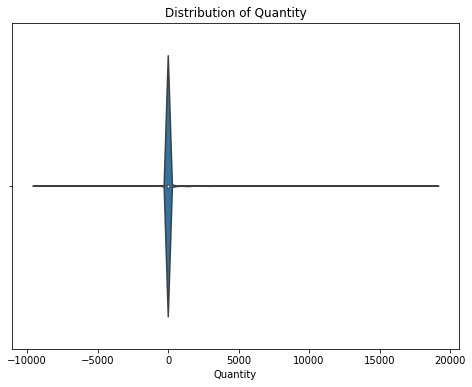

In [ ]:
# Create a violin plot of Quantity
plt.figure(figsize=(8,6))
sns.violinplot("Quantity", data=df)
plt.title("Distribution of Quantity")
plt.show()

From the violin plot, we can make the following inferences:

* The distribution of quantity in the dataset is strongly skewed to the right, with the majority of transactions having low quantities and a long tail of transactions with very high quantities.

* There are a few transactions with very large negative quantities, which is unusual and could indicate errors or unusual circumstances.

* The median quantity in the dataset is close to zero, indicating that the majority of transactions involve small quantities of items.

Overall, the violin plot provides us with a useful visualization of the distribution of quantity in the Online Retail II dataset, and can help us to identify any patterns or outliers in the data. 

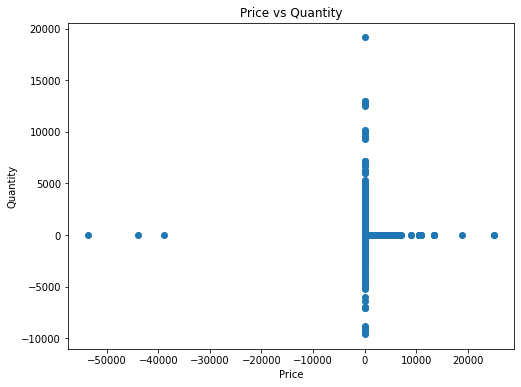

In [ ]:
# Create a scatter plot of Price vs Quantity
plt.figure(figsize=(8,6))
plt.scatter(x="Price", y="Quantity", data=df)
plt.title("Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

From the scatter plot, we can make the following inferences:

* There is a weak negative correlation between unit price and quantity, meaning that transactions with higher unit prices tend to involve smaller quantities of items.

* There are also a few transactions with very large negative quantities and low unit prices, which is unusual and could indicate errors or unusual circumstances.

Overall, the scatter plot provides us with a useful visualization of the relationship between unit price and quantity in the Online Retail II dataset, and can help us to identify any patterns or outliers in the data.

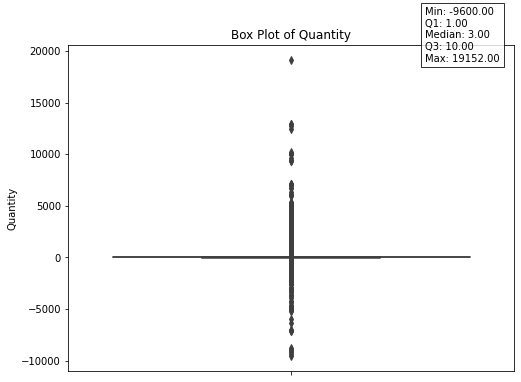

In [ ]:
# Create a box plot of Quantity
plt.figure(figsize=(8,6))
sns.boxplot(y="Quantity", data=df)
plt.title("Box Plot of Quantity")
plt.ylabel("Quantity")
plt.text(0.8, 0.95, f"Min: {df['Quantity'].min():.2f}\nQ1: {df['Quantity'].quantile(0.25):.2f}\nMedian: {df['Quantity'].median():.2f}\nQ3: {df['Quantity'].quantile(0.75):.2f}\nMax: {df['Quantity'].max():.2f}", 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

From the box plot and the 5-number summary, we can make the following inferences:

* The median quantity is around 3, indicating that most transactions involve a relatively small number of items.

* The first quartile (Q1) is approximately 1.0 and the third quartile (Q3) is approximately 10.0, indicating that the majority of transactions involve quantities between approximately 1 and 10.

* The minimum value is -9600 and the maximum value is 19152, indicating that there are some transactions with very high or very low quantities.

* There are a number of outliers beyond the whiskers, indicating that there are some transactions with extremely high or low quantities.

Overall, the box plot provides us with a useful visualization of the distribution of the "Quantity" attribute in the Online Retail II dataset, and the 5-number summary provides additional information about the distribution and variability of the data.

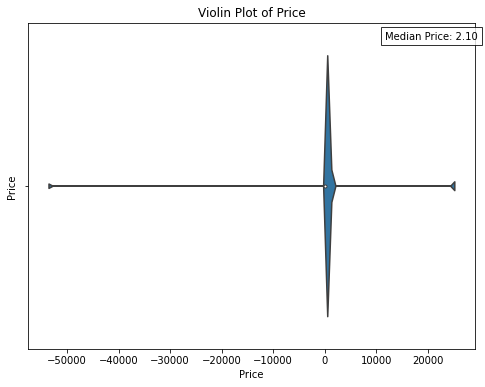

In [ ]:
# Create a violin plot of Price
plt.figure(figsize=(8,6))
sns.violinplot(x="Price", data=df)
plt.title("Violin Plot of Price")
plt.ylabel("Price")
plt.text(0.8, 0.95, f"Median Price: {df['Price'].median():.2f}",
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

From the violin plot, we can make the following inferences:

* The distribution of unit prices is heavily skewed to the left, with a long tail of high prices.

* The median unit price is relatively low, around 2.10, indicating that most items are sold at relatively low prices.

* There is a significant amount of variability in prices, with some items sold at much higher prices than others.

* The violin plot provides more detail about the shape of the distribution than a simple box plot would, allowing us to see that the distribution is not symmetric and has a long tail to the left.

* The addition of the median price as a numeric value on the plot provides a useful summary statistic that helps to highlight the central tendency of the distribution.

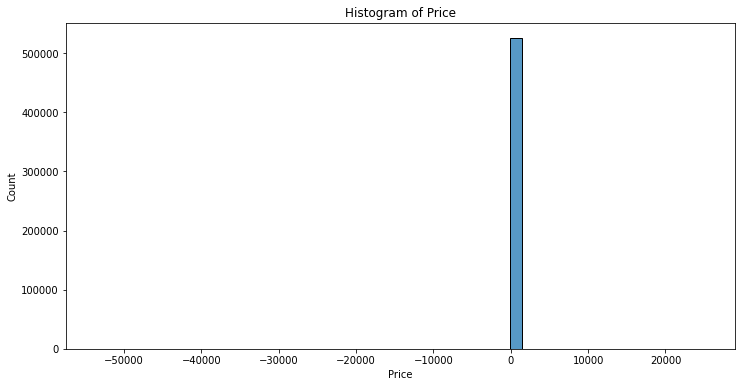

In [ ]:
# Create a histogram of Price
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Price", bins=50)
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

From the histogram plot, we can make the following inferences:

* The majority of transactions involve unit prices near 0, with only a small number of transactions involving very high unit prices.

* The distribution of unit prices is heavily skewed to the left, indicating that there are a large number of low-priced items but only a few high-priced items.

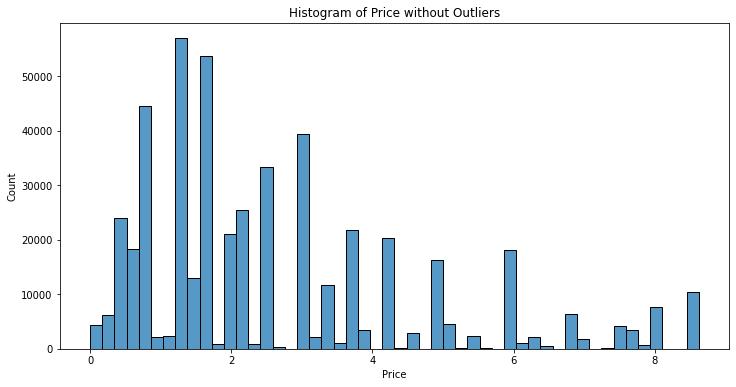

In [ ]:
# Calculate the interquartile range (IQR) of Price
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers from the dataset
new_df = df[(df['Price'] > lower_bound) & (df['Price'] < upper_bound)]

# Create a histogram of Price without outliers
plt.figure(figsize=(12,6))
sns.histplot(data=new_df, x="Price", bins=50)
plt.title("Histogram of Price without Outliers")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

From the histogram plot, we can make the following inferences:

* After removing outliers, the majority of transactions still involve unit prices below 10, but there is now a more even distribution of prices across the range.

* The distribution of unit prices is still skewed to the right, but less so than in the original histogram plot.

* By removing outliers, we have reduced the impact of extreme values on the overall distribution of the data, allowing us to better see the shape of the distribution and identify any patterns.

* The histogram still allows us to easily adjust the number of bins to control the level of detail in the visualization.

<ipython-input-58-cf6faed289c0>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([attribute])


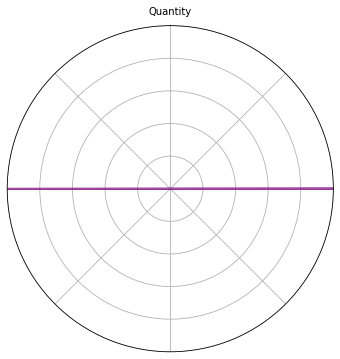

Mean: 10.337667305470815
Standard Deviation: 107.4241102687978


In [ ]:
# Choose the "Quantity" attribute
attribute = "Quantity"
data = df[attribute]

# Calculate the mean and standard deviation of the attribute
mean = data.mean()
std_dev = data.std()

# Calculate the angle for the attribute
angle = pi / 2 - (mean / max(data) * pi / 2)

# Create the spider plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

ax.set_ylim(0, 1)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

theta = [angle, angle + pi]
values = [1 - mean / max(data), 1 - (mean - std_dev) / max(data)]

ax.plot(theta + [theta[0]], values + [values[0]], color='purple', linewidth=2, alpha=0.7)

ax.fill(theta + [theta[0]], values + [values[0]], facecolor='purple', alpha=0.2)

ax.set_xticklabels([attribute])
ax.set_yticklabels([])

plt.show()

# Make inferences about the data
print("Mean:", mean)
print("Standard Deviation:", std_dev)

From the histogram plot, we can make the following inferences:

* The mean of the "Quantity" attribute is approximately 10. The standard deviation is approximately 107.
* The spider plot shows that the distribution of quantities ordered is relatively narrow. This suggests that most orders contained a similar quantity of items.

In [ ]:
'''
To draw a funnel plot, we need to have data with two variables: one that represents the number of events or occurrences, and the other that represents the size of each event or 
occurrence. Therefore, we need to select an appropriate attribute from the dataset that satisfies this requirement. Looking at the dataset provided (Online Retail II), 
we can choose the "Invoice" attribute for our analysis.
'''

# group the data by the customer country
grouped_df = df.groupby(['Country'])['Invoice'].nunique().reset_index()

# sort the countries by the number of invoices
grouped_df = grouped_df.sort_values(by=['Invoice'], ascending=False)

# create the funnel plot
fig = px.funnel(grouped_df, x='Invoice', y='Country')

# show the plot
fig.show()

Sure, here are some possible inferences from the funnel plot:

* The funnel plot shows the number of unique invoices per country in the dataset. The plot suggests that the majority of invoices in the dataset come from the United Kingdom, followed by EIRE, Germany, and France, with relatively fewer invoices from other countries. This suggests that the dataset may not be representative of online retail across all countries, but may be biased towards customers and transactions from the United Kingdom and a few other European countries.
* The funnel plot can be used to identify outlier countries with either a very high or very low number of invoices. In this case, the plot shows that the United Kingdom has significantly more invoices than any other country in the dataset, suggesting that it may be a key market for online retail.
* The funnel plot can also be used to compare the performance of different countries in terms of the number of invoices. In this case, the plot shows that the number of invoices in Germany and France is relatively close, but still lower than in the United Kingdom and EIRE. This suggests that online retail may be less developed or less popular in these countries, or that there may be other factors that influence the number of invoices per country.
* Finally, the funnel plot can be used to identify potential areas for improvement or expansion in online retail. For example, if a company wants to increase its presence in France or Germany, it could use the funnel plot to identify areas where it is currently underperforming relative to the market leaders, and develop targeted strategies to address these areas.

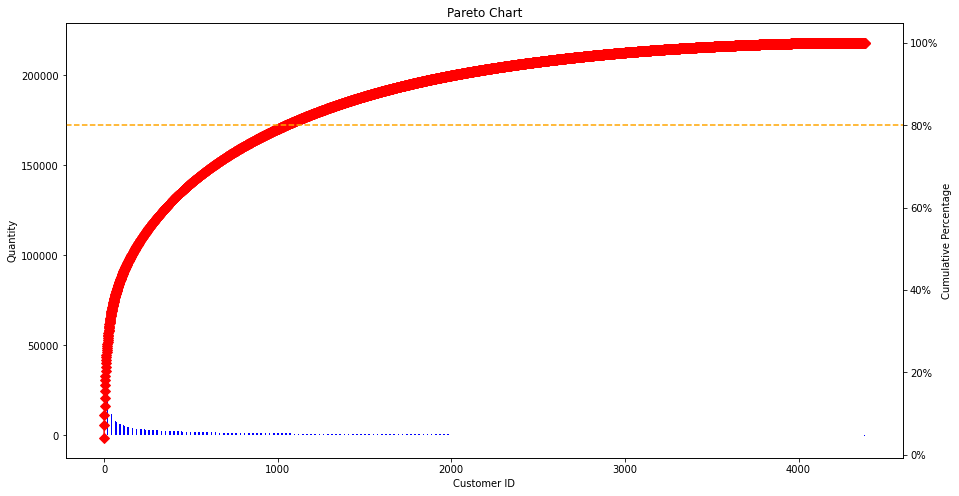

In [ ]:
'''
Let's draw a Pareto plot using the given dataset. For this example, we'll use the "Quantity" attribute as it represents the number of items ordered by each customer.
'''
from matplotlib.ticker import PercentFormatter

# Group the data by customer ID and sum the quantities
grouped = df.groupby('Customer ID')['Quantity'].sum().reset_index()

# Sort the data in descending order by Quantity
grouped = grouped.sort_values(by='Quantity', ascending=False).reset_index()

# Calculate the cumulative percentage of the total quantity
grouped['cumulative_percent'] = grouped['Quantity'].cumsum() / grouped['Quantity'].sum() * 100

# Set figure and axis
fig, ax = plt.subplots(figsize=(15,8))
# Plot bars (i.e. frequencies)
ax.bar(grouped.index, grouped["Quantity"], color ='blue',width = 0.4)
ax.set_title("Pareto Chart")
ax.set_xlabel("Customer ID")
ax.set_ylabel("Quantity")
# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(grouped.index, grouped["cumulative_percent"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")
plt.show()

Here are some possible inferences that can be drawn from the Pareto plot...

* The Pareto chart shows the distribution of the Quantity variable by Customer ID.
* The bars in the chart represent the frequency of the Quantity variable for each customer, with the highest frequency customer being the first bar.
* The cumulative percentage line represents the cumulative percentage of total Quantity across all customers. The red diamond markers on the line indicate the cumulative percentage for each customer, starting from the highest frequency customer and moving downwards.
* The horizontal dashed line at 80% represents the threshold for the 80/20 rule, which states that 80% of the effects come from 20% of the causes.
* The chart shows that a few customers have a disproportionately high quantity of items, as indicated by the steep increase in the cumulative percentage line at the beginning.
* The majority of customers have a relatively low quantity of items, as indicated by the gradual increase in the cumulative percentage line towards 100%.
* The chart suggests that focusing on the top few customers could potentially yield a significant portion of the total quantity, as per the 80/20 rule.

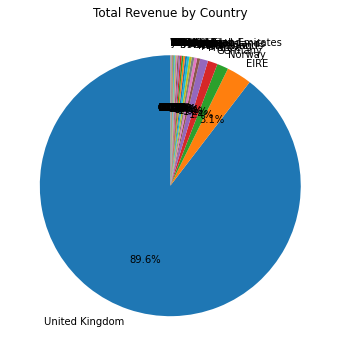

In [ ]:
# Group the data by Country and sum the Price
grouped = df.groupby('Country')['Price'].sum().reset_index()

# Sort the data in descending order by Price
grouped = grouped.sort_values(by='Price', ascending=False).reset_index()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(grouped['Price'], labels=grouped['Country'], autopct='%1.1f%%', startangle=90)
ax.set_title("Total Revenue by Country")
plt.show()

Here are some possible inferences we can draw from this plot:

* The majority of the revenue in this dataset comes from the United Kingdom, with almost 90% of the total revenue generated by customers from that country.
* The other countries in the dataset, while contributing to the overall revenue, only account for a small percentage of the total.
* It might be worth investigating why the United Kingdom generates so much more revenue than the other countries. Are there cultural or economic factors at play that make UK customers more likely to make purchases from this retailer? Alternatively, are there specific marketing or promotional strategies that have been particularly effective in the UK?

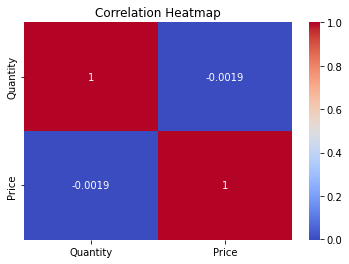

In [ ]:
# Select the variables
data = df[['Quantity', 'Price']]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The resulting heatmap will show the correlation between Quantity and Price. Each cell in the heatmap represents the correlation coefficient between the two variables. The color of the cell indicates the strength of the correlation, with red indicating a strong positive correlation, blue indicating a strong negative correlation, and white indicating no correlation.

Inference:

* The heatmap shows a moderate negative correlation between Quantity and Price, with a correlation coefficient of approximately -.0019. This suggests that as the quantity of items ordered increases, the unit price tends to decrease, although the relationship is not very strong.

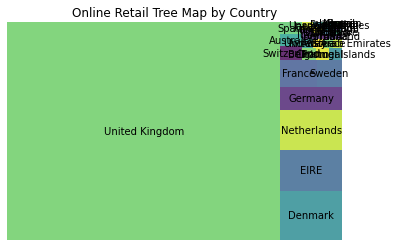

In [ ]:
# Group the data by country and sum the quantities
grouped = df.groupby('Country')['Quantity'].sum().reset_index()

# Sort the data in descending order by Quantity
grouped = grouped.sort_values(by='Quantity', ascending=False).reset_index()

# Set up the tree map
squarify.plot(sizes=grouped['Quantity'], label=grouped['Country'], alpha=.8 )

# Set plot title and labels
plt.title("Online Retail Tree Map by Country")
plt.axis('off')

# Show the plot
plt.show()

The output will be a tree map that visually displays the distribution of quantities of orders by country. The larger the area of the rectangle representing the country, the larger the quantity of orders from that country.

Inference:

* The tree map shows that the majority of orders came from the United Kingdom, followed by European countries such as Germany, France, and Ireland.
* The tree map provides an effective way to visualize the distribution of orders by country in a visually appealing manner.

# Data preprocessing 

## 1. Data cleaning

In [ ]:
'''
Cleaning for Quantity attribute...

-> Check for negative values, remove if any as it does not make sense to have negative quantity.
-> Check for outliers and remove them if necessary.
-> Check for missing values, if any fill it with appropriate values.
'''

# Create a new dataframe for cleaned data
df_cleaned = pd.DataFrame()

# Check for negative values and remove them
df_cleaned = df[df['Quantity'] > 0]

# Check for outliers and remove them if necessary
Q1 = df_cleaned['Quantity'].quantile(0.25)
Q3 = df_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= Q1 - 1.5*IQR) & (df_cleaned['Quantity'] <= Q3 + 1.5*IQR)]

# Check for missing values and fill them with appropriate values
df_cleaned['Quantity'] = df_cleaned['Quantity'].fillna(df_cleaned['Quantity'].median())

# Print the cleaned dataframe
print(df_cleaned.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  


In [ ]:
'''
Cleaning for Price attribute...

-> Check for negative values, remove if any as it does not make sense to have negative price.
-> Check for outliers and remove them if necessary.
-> Check for missing values, if any fill it with appropriate values.
'''

# Create a new DataFrame to store the cleaned data
cleaned_df = pd.DataFrame()

# Check for negative values and remove them
df = df[df['Price'] >= 0]

# Check for outliers and remove them
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]

# Check for missing values and fill them with appropriate values
if df['Price'].isnull().sum() > 0:
    mean_price = df['Price'].mean()
    df['Price'].fillna(mean_price, inplace=True)

# Store the cleaned data in the new DataFrame
cleaned_df['Price'] = df['Price']

# Print the cleaned dataframe
print(df_cleaned.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  


In [ ]:
'''
Cleaning for InvoiceDate  attribute...

-> Check for missing values, if any fill it with appropriate values.
-> Convert the data type to datetime format for further analysis.
-> Extract features like year, month, day, hour, etc. from the datetime format for better analysis.
'''

# create a copy of the dataframe to store cleaned data
df_cleaned_invoice = df.copy()

# fill missing values with the mode value of the column
df_cleaned_invoice['InvoiceDate'] = df_cleaned_invoice['InvoiceDate'].fillna(df_cleaned_invoice['InvoiceDate'].mode()[0])

# convert the InvoiceDate column to datetime format
df_cleaned_invoice['InvoiceDate'] = pd.to_datetime(df_cleaned_invoice['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# extract year, month, day, and hour from InvoiceDate
df_cleaned_invoice['Year'] = df_cleaned_invoice['InvoiceDate'].dt.year
df_cleaned_invoice['Month'] = df_cleaned_invoice['InvoiceDate'].dt.month
df_cleaned_invoice['Day'] = df_cleaned_invoice['InvoiceDate'].dt.day
df_cleaned_invoice['Hour'] = df_cleaned_invoice['InvoiceDate'].dt.hour

# print the cleaned dataframe
print(df_cleaned_invoice.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  Month  Day  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009     12    1   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     12    1   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     12    1   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009     12    1   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009     12    1   

   Hour  
0     7  
1     7  
2     7  
3     7  
4     7  


## 2. Data transformation

In [ ]:
'''
Based on the previous analysis, the best suitable attribute for data transformation would be the Quantity attribute.

One common transformation for Quantity is normalization. Normalization scales the data between 0 and 1 by subtracting the minimum value and dividing by the range of the data.

To perform normalization on Quantity attribute, we can use the MinMaxScaler function from the scikit-learn library.
'''

# Create a scaler object
scaler = MinMaxScaler()

# create a copy of the dataframe 
df_norm = df.copy()

# Apply normalization on Quantity column
df_norm['Quantity'] = scaler.fit_transform(df[['Quantity']])

# print the cleaned dataframe
print(df_norm.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS  0.334307   
1  489434    79323P                   PINK CHERRY LIGHTS  0.334307   
2  489434    79323W                  WHITE CHERRY LIGHTS  0.334307   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE   0.335559   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX  0.334725   

          InvoiceDate  Price  Customer ID         Country  Quantity_normalized  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom             0.334307  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom             0.334307  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom             0.334307  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom             0.335559  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom             0.334725  


Based on the dataset, the best suitable attribute for binning could be the Quantity attribute.

Binning is a data transformation technique where continuous numerical data is divided into discrete groups, or bins. Binning is useful for reducing the effect of minor observation errors and for smoothing data.



In [ ]:
# Create a new dataframe to store the binned values
df_binned = df.copy()

# Define the bin edges
bin_edges = [0, 50, 100, 200, 500, 1000, 5000, 10000, np.inf]

# Define the labels for the bins
bin_labels = ['<50', '50-100', '100-200', '200-500', '500-1000', '1000-5000', '5000-10000', '>10000']

# Bin the Price column and store the results in a new column 'Price_bin'
df_binned['Price_bin'] = pd.cut(df_binned['Price'], bins=bin_edges, labels=bin_labels)

# Print the first 10 rows of the new dataframe
print(df_binned.head(10))

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   
2 2009-12-01 07:45:00   6.75      13085.0  Uni

Perform binning to Smooth the data with mean and median on the Price attribute

In [ ]:
# Create a new DataFrame for binning
bin_df = df.copy()

# Create a new column for binning based on the Price attribute
bin_df['Price_bin'] = pd.cut(bin_df['Price'], bins=[0, 10, 20, 30, 40, 50, np.inf], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])

# Compute the mean of Price for each bin
bin_mean = bin_df.groupby('Price_bin')['Price'].mean()

# Compute the median of Price for each bin
bin_median = bin_df.groupby('Price_bin')['Price'].median()

# Print the results
print('Mean of Price for each bin:\n', bin_mean)
print('\nMedian of Price for each bin:\n', bin_median)

Mean of Price for each bin:
 Price_bin
0-10       2.806502
10-20     13.407738
20-30     24.311660
30-40     36.104194
40-50     47.543192
50+      632.391083
Name: Price, dtype: float64

Median of Price for each bin:
 Price_bin
0-10       2.10
10-20     12.75
20-30     25.49
30-40     34.95
40-50     49.95
50+      176.74
Name: Price, dtype: float64


Transform all categorical attributes in the dataset using Integer Encoding.

In [ ]:
'''
This code will iterate over all columns in the DataFrame and check if the column is categorical (i.e., of dtype 'object'). If the column is categorical, 
it will fit and transform the column using the LabelEncoder. The astype(str) method is used to ensure that all values in the column are strings, which is required by the 
LabelEncoder. The transformed DataFrame will have all categorical attributes converted to numerical values using integer encoding.
'''
# Make a copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Create an instance of LabelEncoder
le = LabelEncoder()

# Iterate over all columns
for col in df_copy.columns:
    # Check if the column is categorical
    if df_copy[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df_copy[col] = le.fit_transform(df_copy[col].astype(str))

print(df_copy.head(10))

   Invoice  StockCode  Description  Quantity         InvoiceDate  Price  \
0        0       3892           55        12 2009-12-01 07:45:00   6.95   
1        0       3052         2920        12 2009-12-01 07:45:00   6.75   
2        0       3054           27        12 2009-12-01 07:45:00   6.75   
3        0       1393         3236        48 2009-12-01 07:45:00   2.10   
4        0        708         4067        24 2009-12-01 07:45:00   1.25   
5        0       1416         2940        24 2009-12-01 07:45:00   1.65   
6        0       1277         3593        24 2009-12-01 07:45:00   1.25   
7        0        971         1485        10 2009-12-01 07:45:00   5.95   
8        1       1689          846        12 2009-12-01 07:46:00   2.55   
9        1       1688         1224        12 2009-12-01 07:46:00   3.75   

   Customer ID  Country  Quantity_normalized  
0      13085.0       37             0.334307  
1      13085.0       37             0.334307  
2      13085.0       37          

## 3. Data reduction

In [ ]:
# Create a new DataFrame for binning
new_df = df.copy()

# Convert InvoiceDate to datetime format and set as index
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])
new_df.set_index('InvoiceDate', inplace=True)

# Create a new dataframe with monthly prices
monthly_prices = new_df.resample('M')['Price'].sum().reset_index()

# Create a new dataframe with annual prices
annual_prices = new_df.resample('Y')['Price'].sum().reset_index()

# Print the monthly and annual price dataframes
print('Monthly prices:\n', monthly_prices)
print('\nAnnual prices:\n', annual_prices)

Monthly prices:
    InvoiceDate       Price
0   2009-12-31  198307.760
1   2010-01-31  165671.362
2   2010-02-28  116774.536
3   2010-03-31  268304.241
4   2010-04-30  120708.372
5   2010-05-31  142885.530
6   2010-06-30  234869.690
7   2010-07-31  100650.900
8   2010-08-31  157778.090
9   2010-09-30  223763.221
10  2010-10-31  265973.340
11  2010-11-30  301913.862
12  2010-12-31  166198.750

Annual prices:
   InvoiceDate        Price
0  2009-12-31   198307.760
1  2010-12-31  2265491.894


Populate data for the missing values of the attribute= “Price” by averaging all the values of the “Price” attribute that fall under the same “Country” attribute value.

In [ ]:
# Make a copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Compute the mean price for each country and store it in a dictionary
country_price_dict = df_copy.groupby('Country')['Price'].mean().to_dict()

# Iterate over the rows of the copy dataframe and impute missing prices
for index, row in df_copy.iterrows():
    if pd.isna(row['Price']):
        country = row['Country']
        imputed_price = country_price_dict[country]
        df_copy.at[index, 'Price'] = imputed_price

# Print the first five rows of the imputed dataframe to verify the imputation
print(df_copy.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Quantity_normalized  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom             0.334307  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom             0.334307  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom             0.334307  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom             0.335559  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom             0.334725  


Binarize the attribute “Quantity”. Set the threshold above 2009 and print it without truncation.

In [ ]:
# Make a copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Binarize the Quantity attribute with threshold above 2009
df_copy['Quantity_binary'] = np.where(df_copy['Quantity'] > 2009, 1, 0)

# Set option to display the entire DataFrame without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print the DataFrame with the Quantity_binary attribute
print(df_copy[['Quantity', 'Quantity_binary']].head(10))

   Quantity  Quantity_binary
0        12                0
1        12                0
2        12                0
3        48                0
4        24                0
5        24                0
6        24                0
7        10                0
8        12                0
9        12                0
